# Histogram of Predicted Uncertainties

This plots data written by the `process_uncertainties.py` script.

In [16]:
import sys

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('..')
from constants import MIN_DAYSAHEAD, MAX_DAYSAHEAD

sns.set()

In [17]:
dfs = {}

for i in range(MIN_DAYSAHEAD, MAX_DAYSAHEAD + 1):
    dfs[i] = pd.read_csv(f'../data/processed/processed_daysahead{i}_R000.csv')
    
dfs[1] .head()

,current_time,forward_time0,Vp_pred0,Vp_obs0,sigma0,crps0,forward_time1,Vp_pred1,Vp_obs1,sigma1,...,forward_time2,Vp_pred2,Vp_obs2,sigma2,crps2,forward_time3,Vp_pred3,Vp_obs3,sigma3,crps3
0,2010-01-06 18:00:00,2010-01-07 00:00:00,313.100000,307.610000,64.345831,15.224052,2010-01-07 06:00:00,306.150000,293.158333,84.738204,...,2010-01-07 12:00:00,299.200000,282.966667,104.161217,25.349213,2010-01-07 18:00:00,310.615385,283.506667,107.132278,27.758344
1,2010-01-07 00:00:00,2010-01-07 06:00:00,306.150000,293.158333,67.734154,16.820200,2010-01-07 12:00:00,299.200000,282.966667,92.508446,...,2010-01-07 18:00:00,310.615385,283.506667,104.653420,27.242816,2010-01-08 00:00:00,311.900000,303.408333,107.500048,25.389683
2,2010-01-07 06:00:00,2010-01-07 12:00:00,299.200000,282.966667,58.765539,15.510890,2010-01-07 18:00:00,310.615385,283.506667,82.503682,...,2010-01-08 00:00:00,311.900000,303.408333,103.549962,24.476759,2010-01-08 06:00:00,303.800000,301.767500,107.472441,25.131104
3,2010-01-07 12:00:00,2010-01-07 18:00:00,310.615385,283.506667,59.251600,18.710244,2010-01-08 00:00:00,311.900000,303.408333,83.865706,...,2010-01-08 06:00:00,303.800000,301.767500,101.635209,23.767853,2010-01-08 12:00:00,327.087500,286.885000,107.960524,31.134194
4,2010-01-07 18:00:00,2010-01-08 00:00:00,311.900000,303.408333,57.405524,13.915591,2010-01-08 06:00:00,303.800000,301.767500,71.132267,...,2010-01-08 12:00:00,327.087500,286.885000,93.399814,28.625937,2010-01-08 18:00:00,303.475000,283.535000,102.364343,25.466723


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


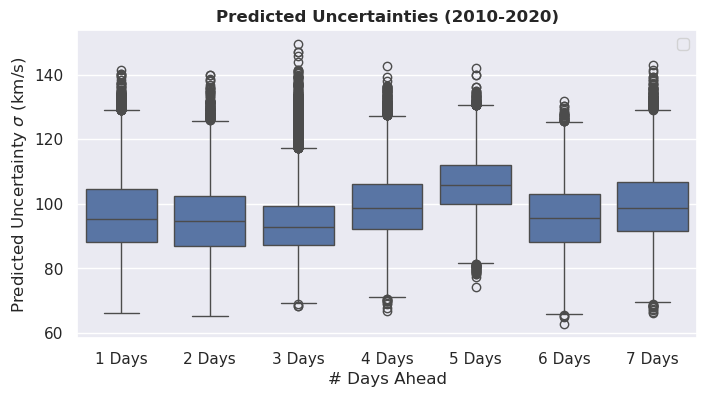

In [34]:

bins = np.arange(35, 190, 1)

plt.figure(figsize=(8, 4))

data_list = []

for daysahead, df in dfs.items():
    for value in df[df.columns[-2]]:
        data_list.append(dict(group=f"{daysahead} Days", value=value))

sns.boxplot(pd.DataFrame(data_list), x="group", y="value")
plt.ylabel(r'Predicted Uncertainty $\sigma$ (km/s)')
ax.get_legend().set_title('Days Ahead')
plt.legend()
plt.xlabel('# Days Ahead')
plt.title('Predicted Uncertainties (2010-2020)', fontweight='bold')
plt.savefig('../plots/histogram_of_sigmas.png', dpi=300)